### Importing the necessary libraries



In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###Loading the data set

In [28]:
train=pd.read_csv('train.csv')
train 

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45523,CST_130421,Doris,55,F,N,N,2.0,96207.57,117.0,Unknown,4.0,0.0,11229.54,29663.83,82,907.0,0,0,0
45524,CST_136670,Luciana,31,F,N,Y,0.0,383476.74,966.0,Accountants,2.0,1.0,43369.91,139947.16,32,679.0,0,0,0
45525,CST_145435,Jessica,27,F,N,Y,0.0,260052.18,1420.0,Core staff,2.0,0.0,22707.51,83961.83,46,727.0,0,0,0
45526,CST_130913,Tessa,32,M,Y,N,0.0,157363.04,2457.0,Laborers,2.0,0.0,20150.10,25538.72,92,805.0,0,0,0


### Checking for imbalance in the classes

In [29]:
train['credit_card_default'].value_counts()

0    41831
1     3697
Name: credit_card_default, dtype: int64

### Categorical variables transformation to category codes

In [30]:
train['owns_car']=train.owns_car.astype('category').cat.codes
train['gender']=train.gender.astype('category').cat.codes
train['owns_house']=train.owns_house.astype('category').cat.codes
train['occupation_type']=train.occupation_type.astype('category').cat.codes

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  int8   
 4   owns_car                 45528 non-null  int8   
 5   owns_house               45528 non-null  int8   
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  int8   
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

### Filling the missing data as necessary

In [32]:
list=['no_of_children','no_of_days_employed','total_family_members','migrant_worker','yearly_debt_payments','credit_score']
for i in list:
  if i=='no_of_children' or i=='total_family_members':
     train[i].fillna(value=train[i].mode()[0],inplace=True)
  else:
   train[i].fillna(value=train[i].mean(),inplace=True)
#for i in list:
  #if i=='no_of_children' or i=='total_family_members':
     #test[i].fillna(value=test[i].mode()[0],inplace=True)
  #else:
   #test[i].fillna(value=test[i].mean(),inplace=True)


### Removing the unwanted variables and creating the two dataframe X,Y

In [33]:
y=pd.DataFrame(train['credit_card_default'])
X=train.drop(['customer_id','name','credit_card_default'],axis=1)


### Synthetic Minority Oversampling Technique for removing class imbalance

In [34]:
from imblearn.combine import SMOTETomek
smc=SMOTETomek(random_state=42)
X_res,y_res=smc.fit_resample(X,y)

### Normalising the data set

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_res)


array([[ 0.82730153, -0.62427609, -0.51895415, ..., -1.27346123,
         3.88274268,  1.97904935],
       [-1.10155655,  1.60165947, -0.51895415, ...,  1.29397858,
        -0.56144662, -0.50529311],
       [-0.19385863,  1.60165947, -0.51895415, ..., -0.40397682,
        -0.56144662, -0.50529311],
       ...,
       [-0.08039639,  1.60165947, -0.51895415, ..., -0.98627564,
         1.66064803, -0.50529311],
       [-0.08039639, -0.62427609, -0.51895415, ..., -0.59398151,
         1.66064803, -0.50529311],
       [-0.76116983, -0.62427609, -0.51895415, ..., -0.34993361,
        -0.56144662, -0.50529311]])

### Creating a train and test split

In [36]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

### Xgboost algorithm applied on X_train

In [37]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder 
model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=0.5,
 seed=27)
#lc = LabelEncoder() 
model.fit(X_train, y_train)
predict = model.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Evaluating the predicted results 

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predict))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8119
           1       0.99      0.99      0.99      8089

    accuracy                           0.99     16208
   macro avg       0.99      0.99      0.99     16208
weighted avg       0.99      0.99      0.99     16208



### Plotting the heatmap of the confusion matrix

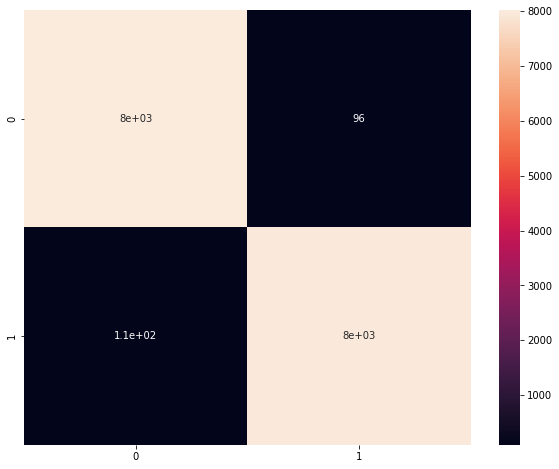

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,predict),annot=True)